In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    log_loss,
    balanced_accuracy_score,
    matthews_corrcoef,
    precision_recall_curve,
    average_precision_score,
    cohen_kappa_score,
    hamming_loss,
    jaccard_score,
    zero_one_loss
)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/red-wine-quaility-dataset/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


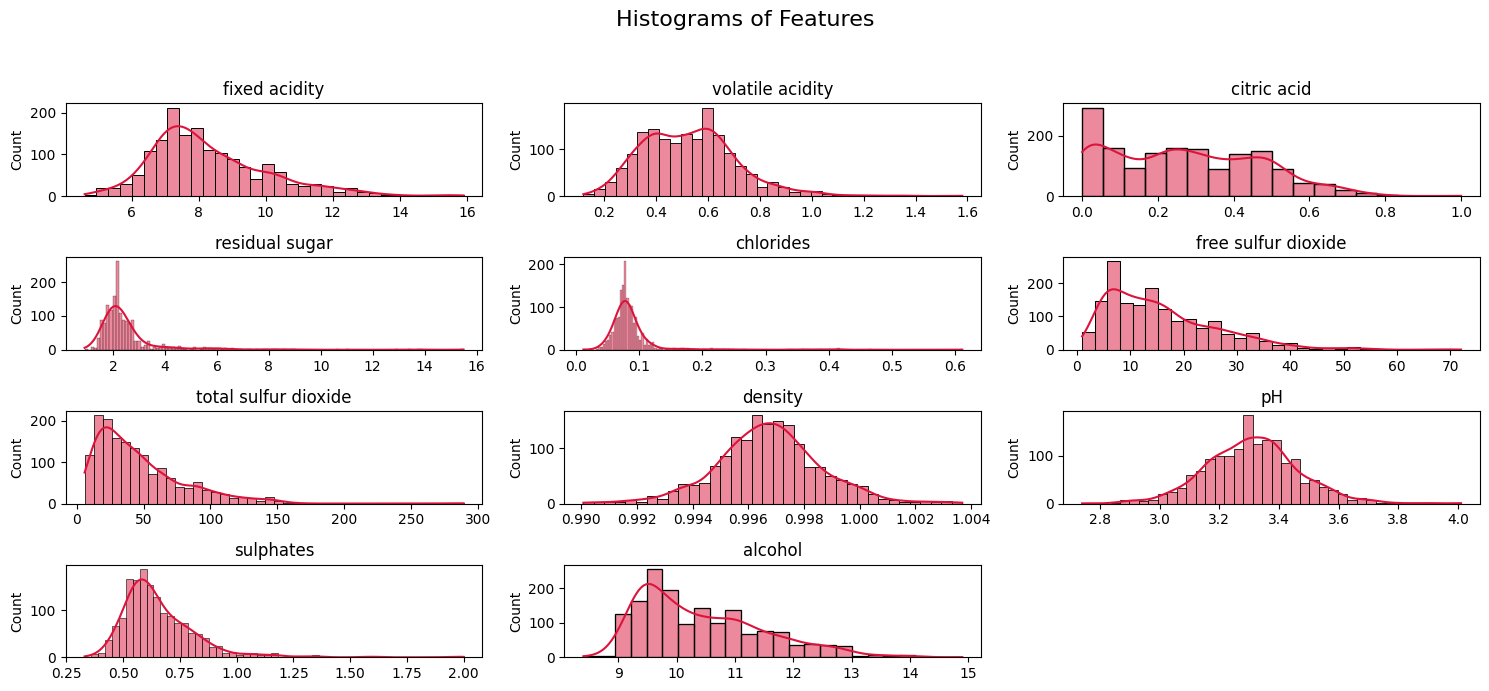

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(15, 7))
features = df.columns[:-1]
fig.suptitle('Histograms of Features', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(features):
    sns.histplot(df[column], kde=True, ax=axes[i],color="crimson")
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
# Remove empty subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

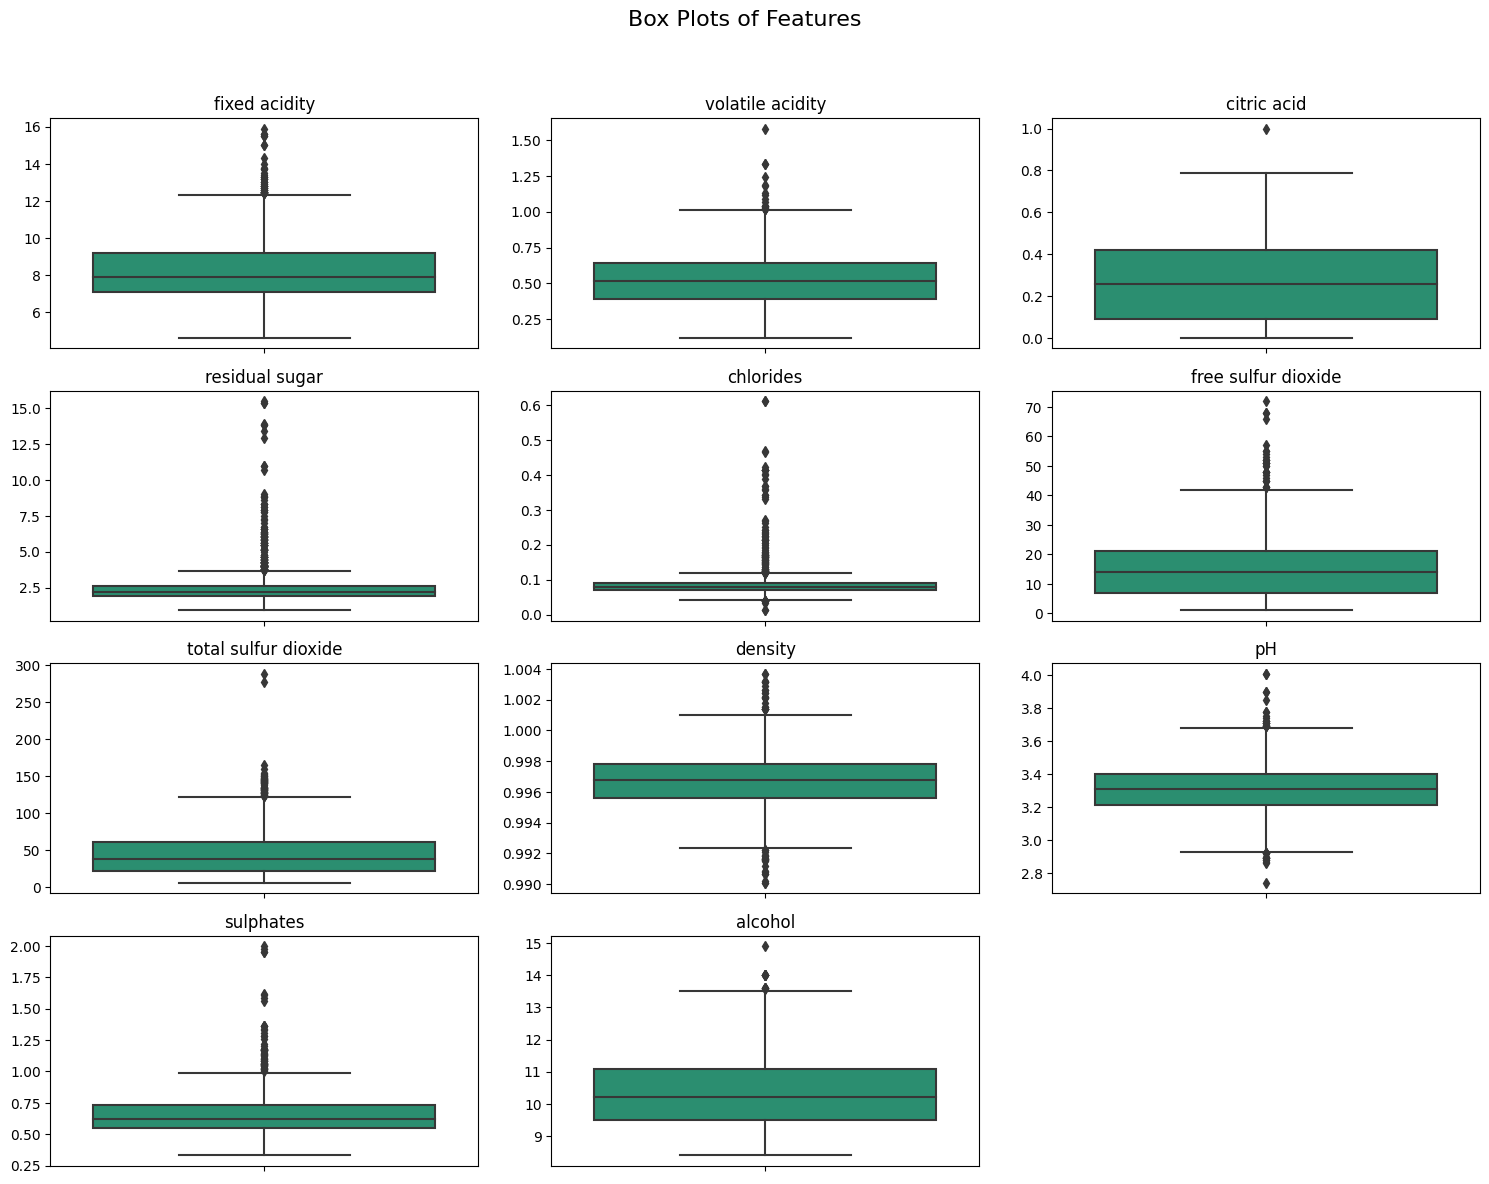

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Box Plots of Features', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(features):
    sns.boxplot(y=df[column], ax=axes[i],palette="Dark2")
    axes[i].set_title(column)
    axes[i].set_ylabel('')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

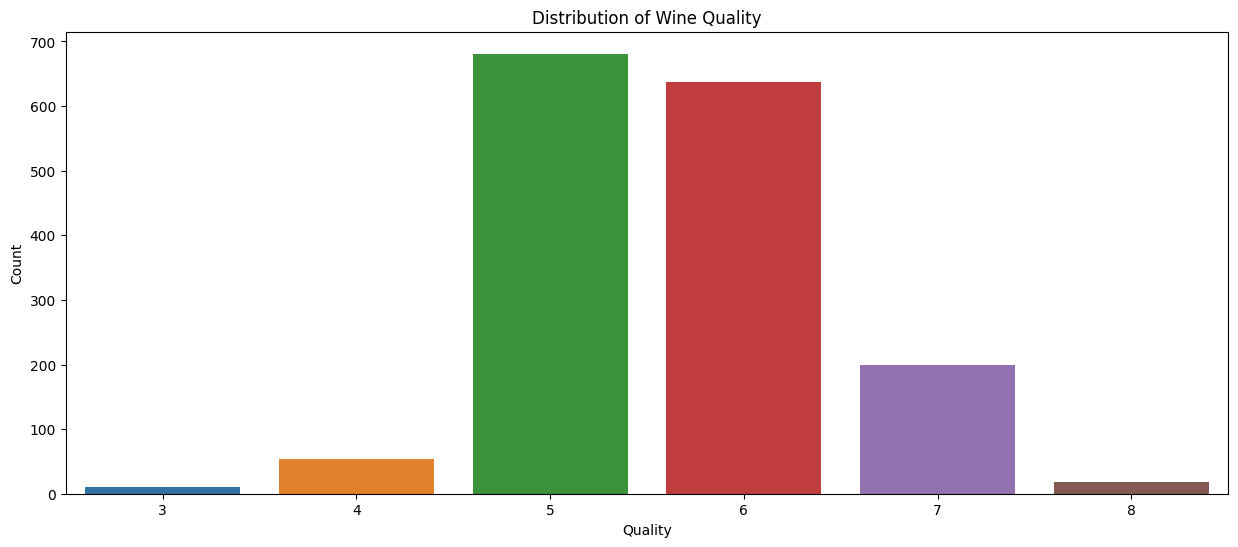

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

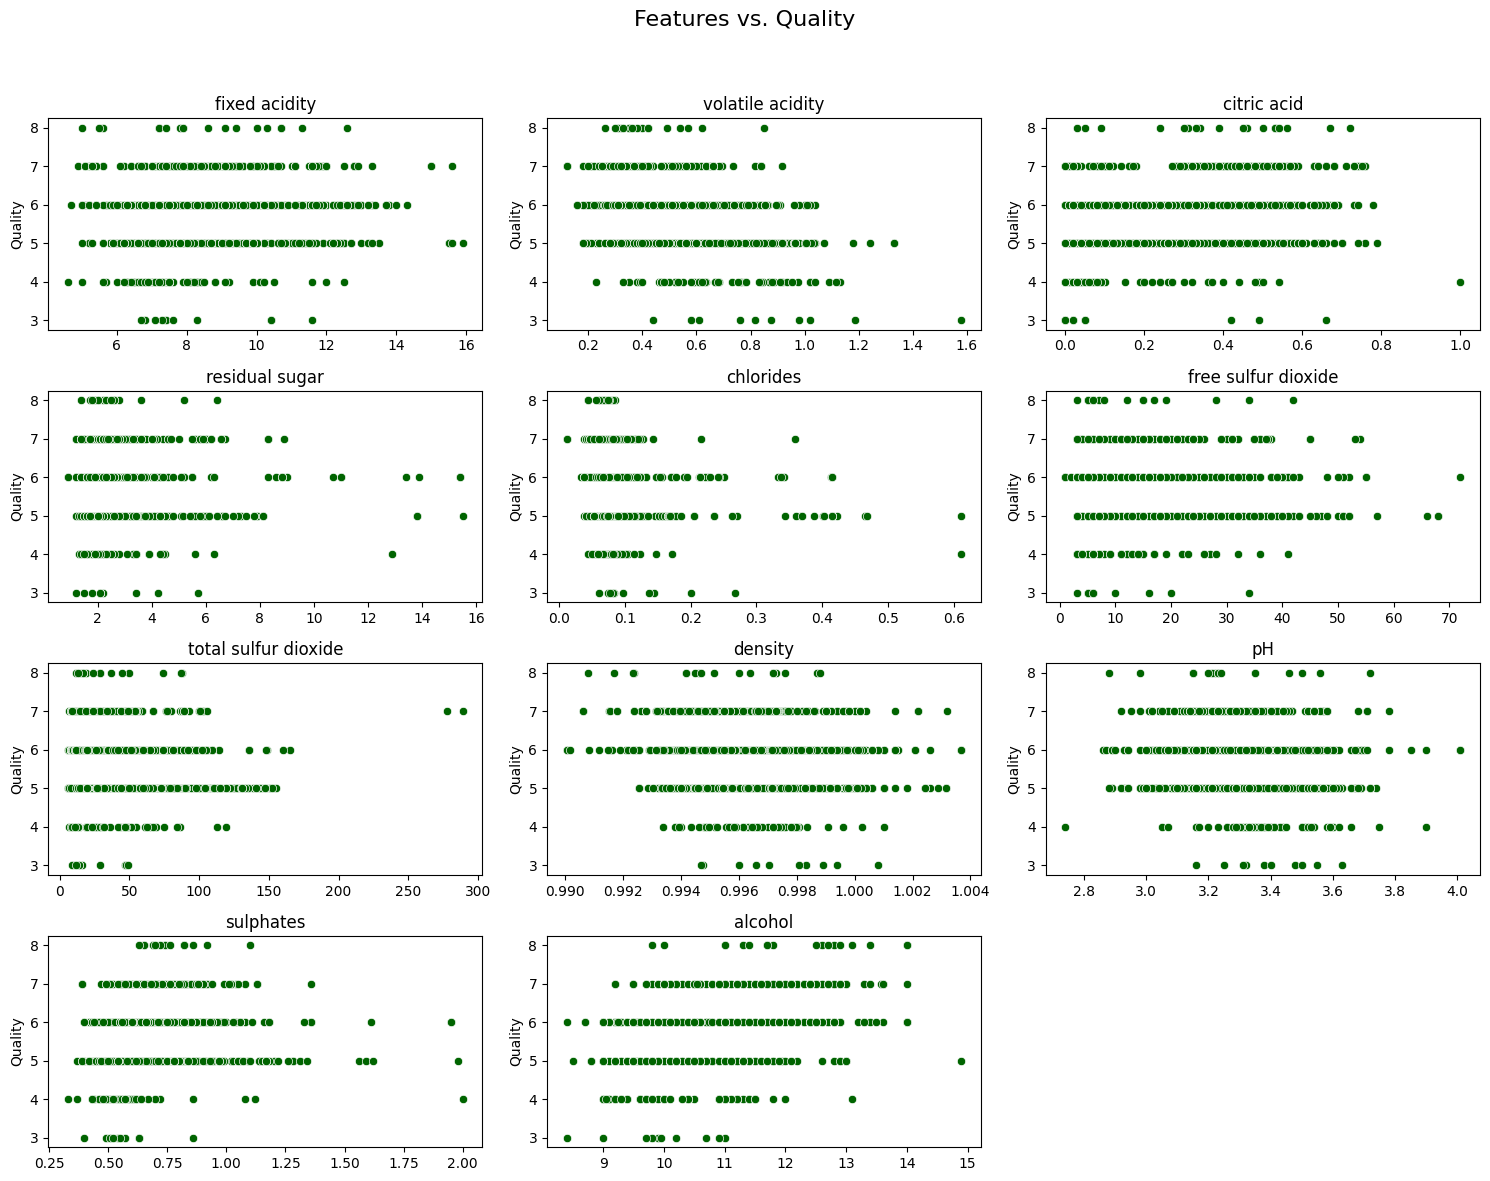

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Features vs. Quality', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(features):
    sns.scatterplot(x=df[column], y=df['quality'], ax=axes[i],color="darkgreen")
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Quality')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

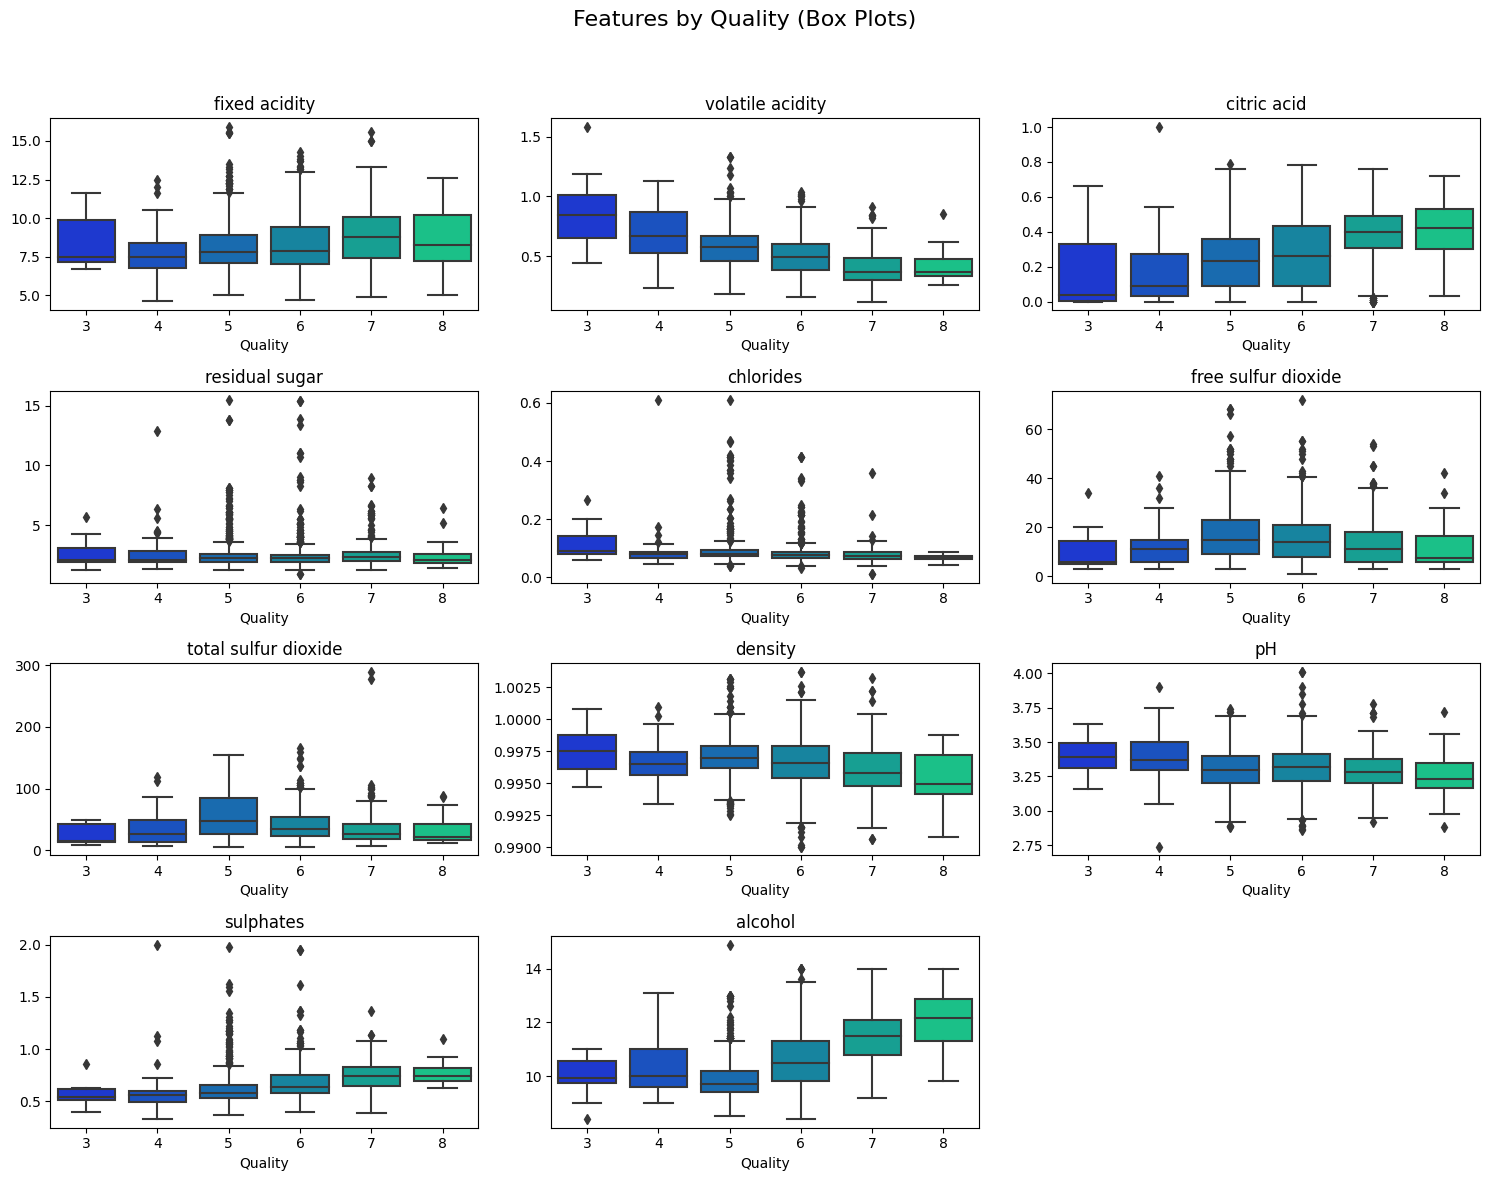

In [13]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Features by Quality (Box Plots)', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(features):
    sns.boxplot(x='quality', y=column, data=df, ax=axes[i],palette="winter")
    axes[i].set_title(column)
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel('')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

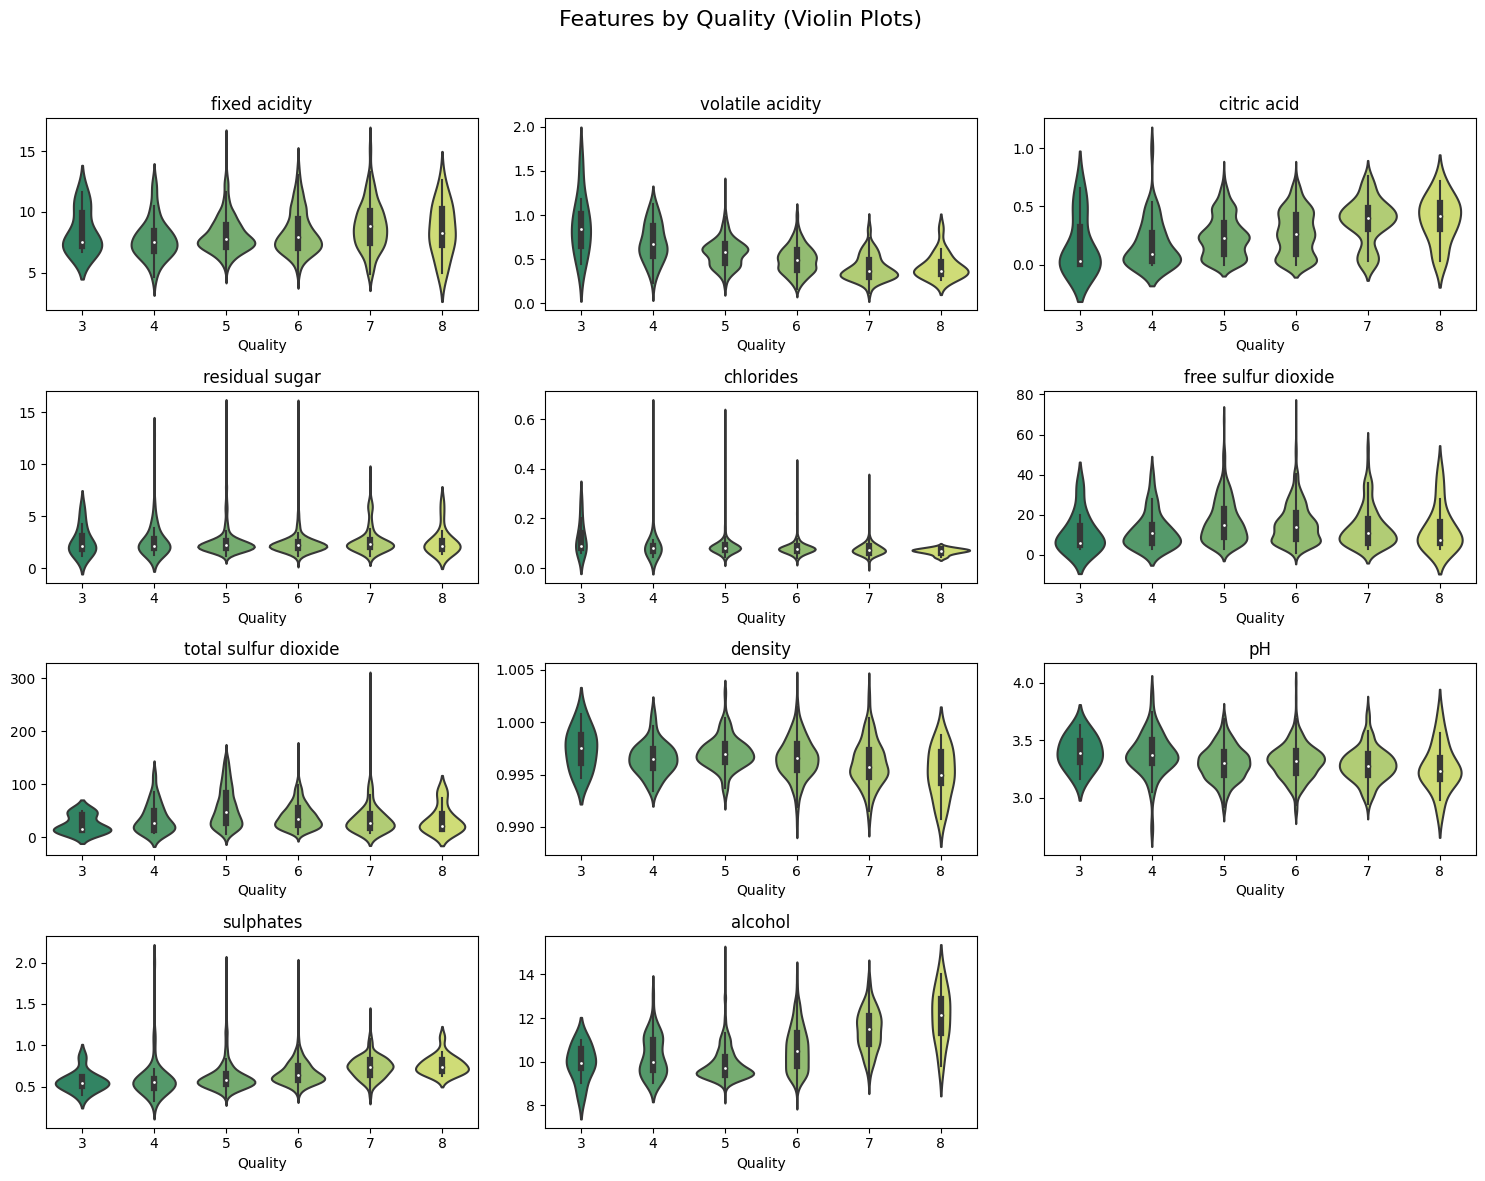

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Features by Quality (Violin Plots)', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(features):
    sns.violinplot(x='quality', y=column, data=df, ax=axes[i],palette="summer")
    axes[i].set_title(column)
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel('')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

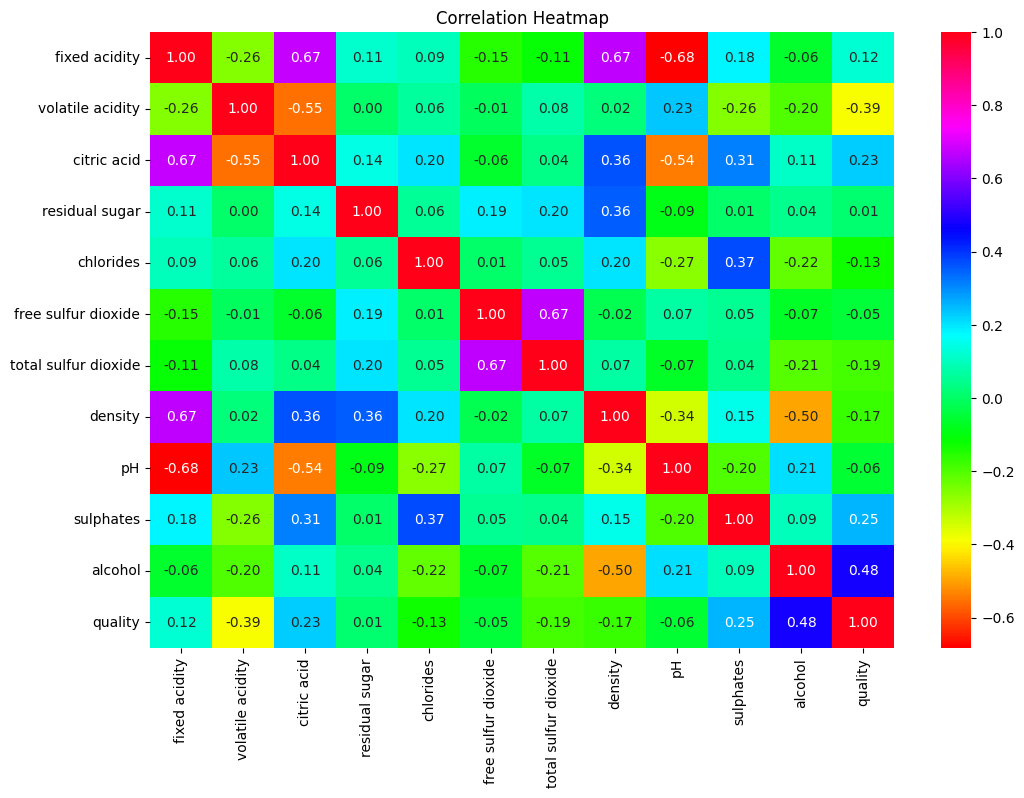

In [15]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='hsv', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

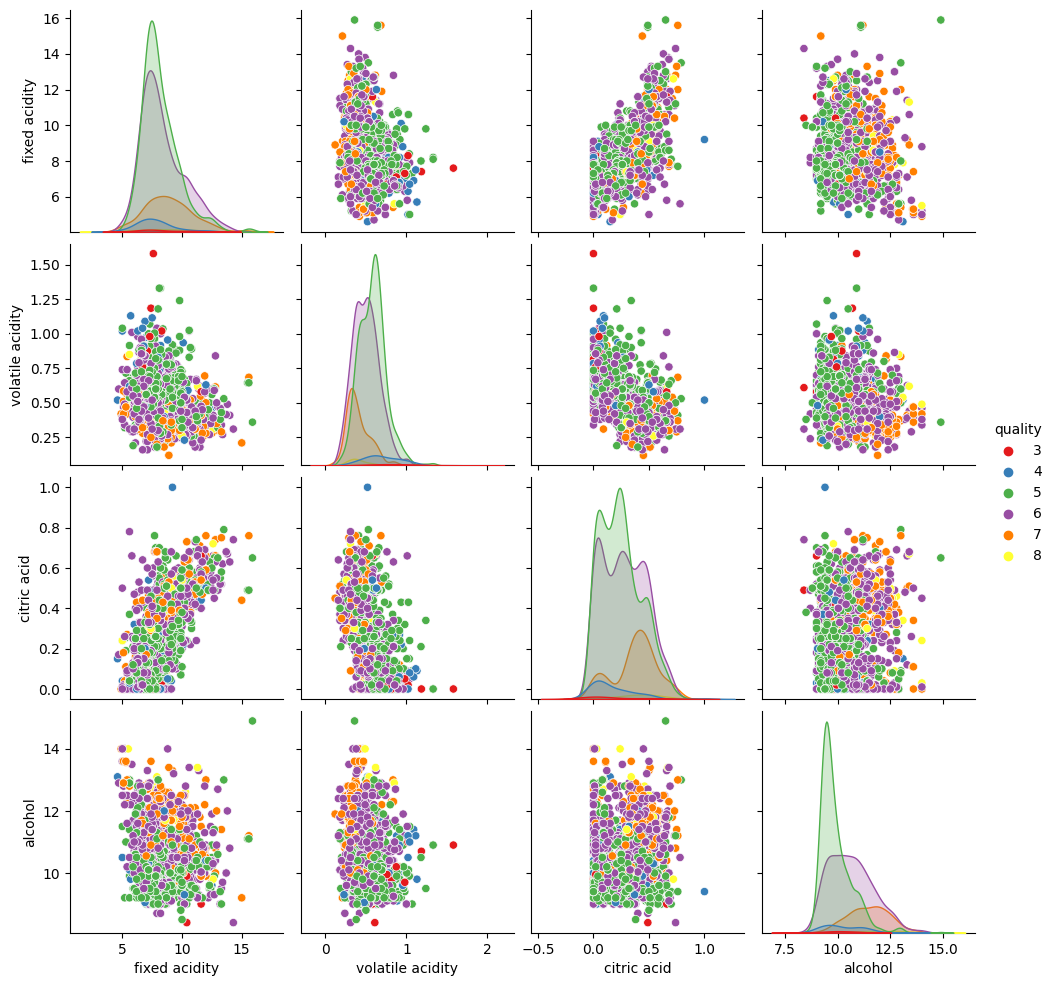

In [16]:
subset_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']
sns.pairplot(df[subset_cols], hue='quality', palette='Set1')
plt.show()

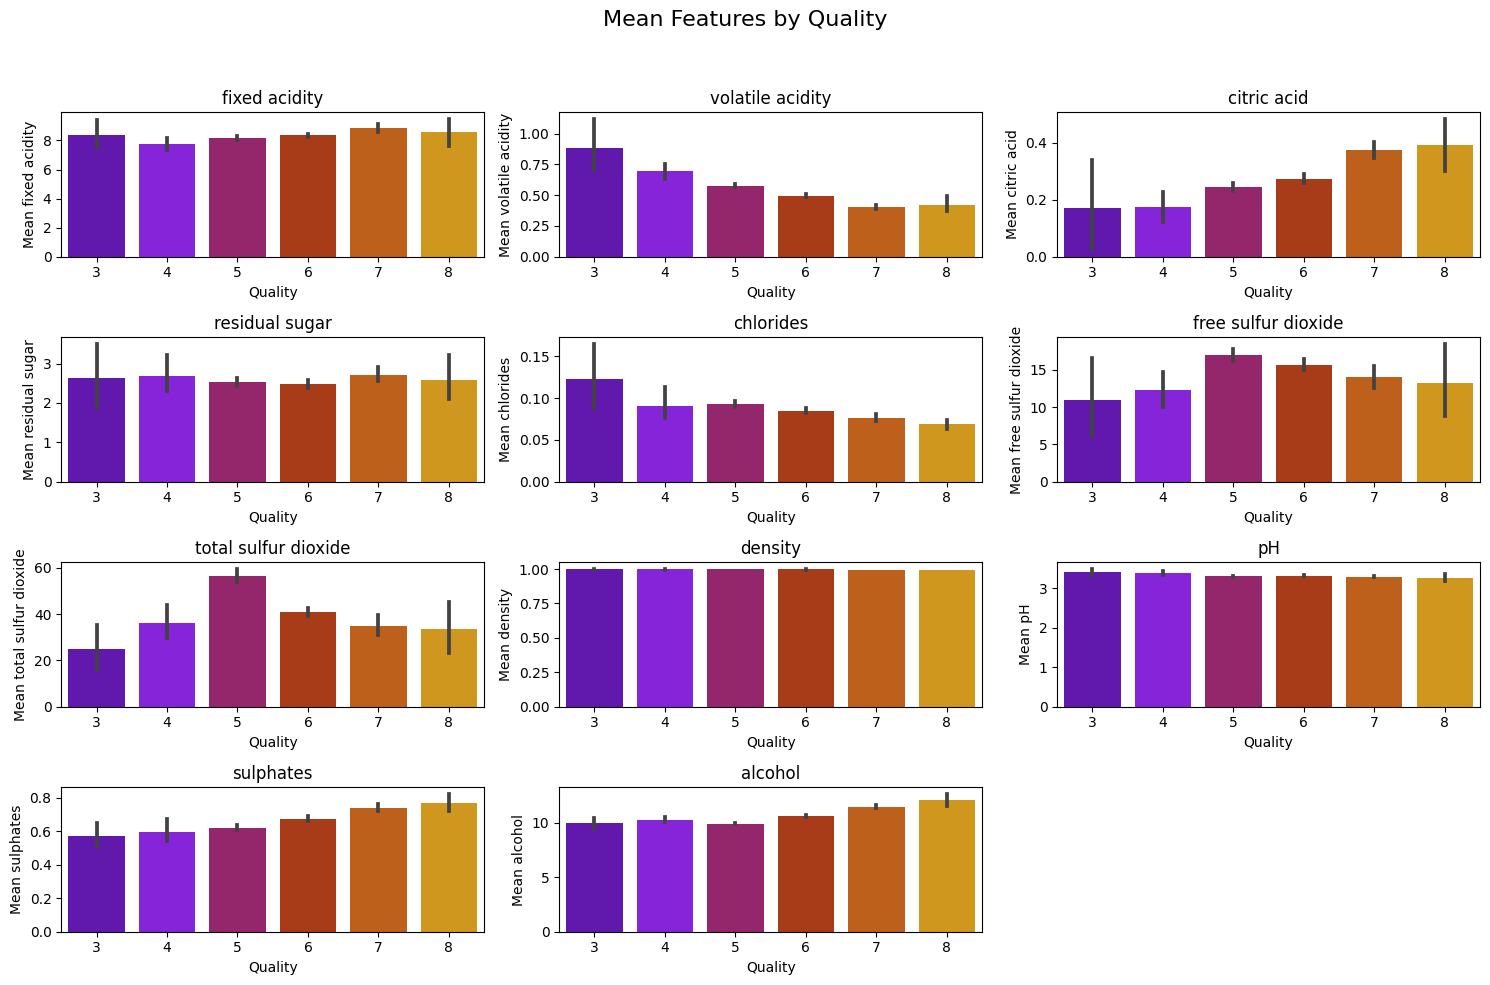

In [17]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
fig.suptitle('Mean Features by Quality', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(features):
    sns.barplot(x='quality', y=column, data=df, ax=axes[i],palette="gnuplot")
    axes[i].set_title(column)
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(f'Mean {column}')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

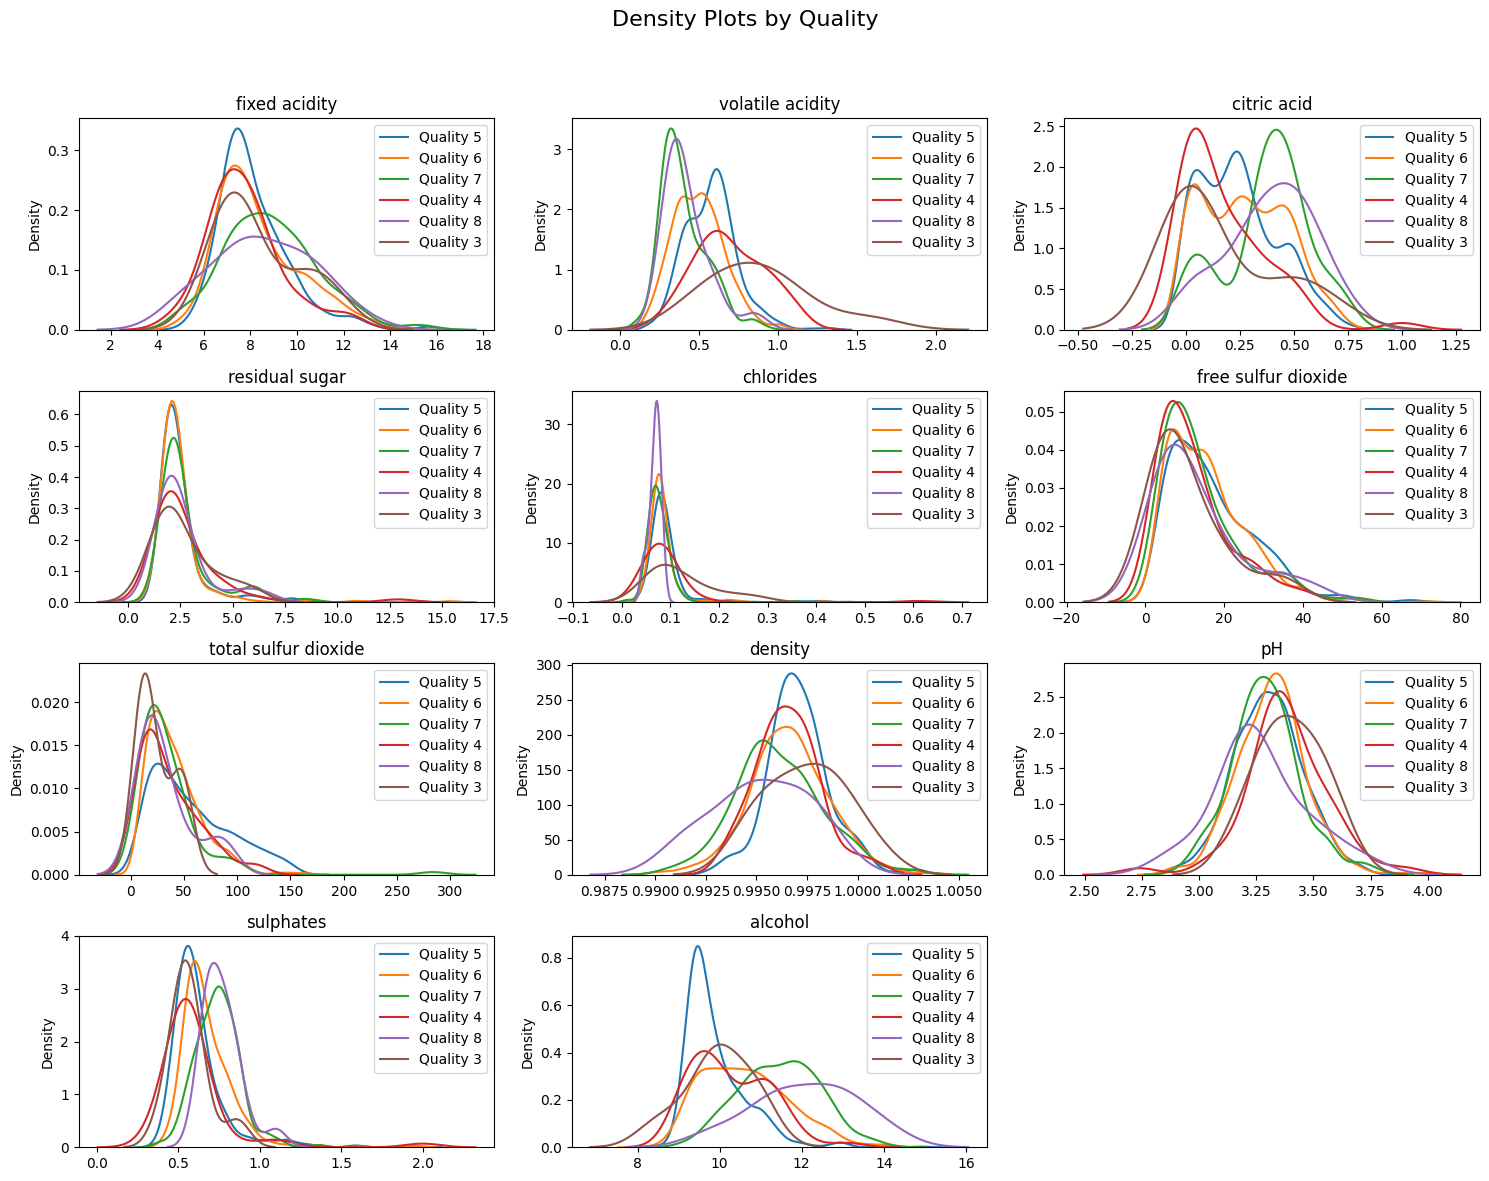

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Density Plots by Quality', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(features):
    for quality in df['quality'].unique():
        sns.kdeplot(df[df['quality'] == quality][column], label=f'Quality {quality}', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
    axes[i].legend()
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
def quality_label(quality):
    if quality <= 4:
        return 0  # Low
    elif quality <= 6:
        return 1  # Medium
    else:
        return 2  # High

df['quality'] = df['quality'].apply(quality_label)


In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X = df.drop("quality", axis=1)
y = df["quality"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb_model = XGBClassifier(n_estimators=1000,learning_rate=0.1,max_depth=6)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

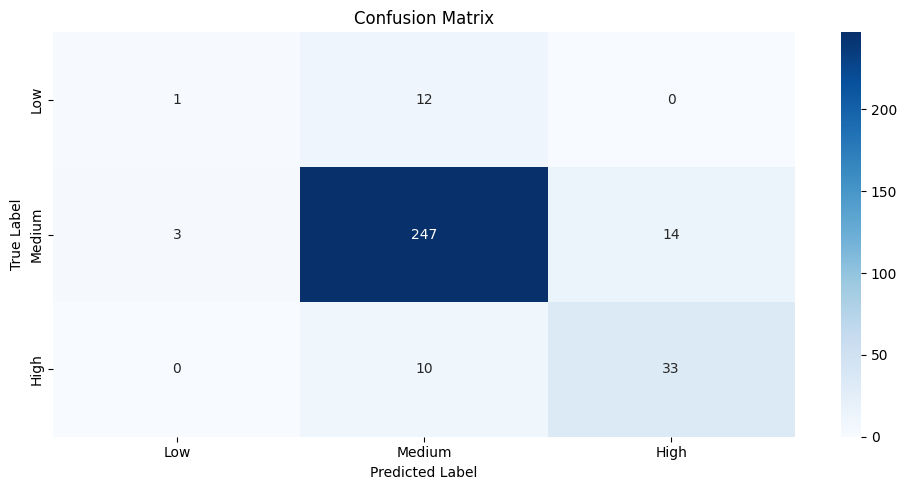

In [24]:
y_pred=xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [25]:
label_name=['Low', 'Medium', 'High']
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_name))

Classification Report:

              precision    recall  f1-score   support

         Low       0.25      0.08      0.12        13
      Medium       0.92      0.94      0.93       264
        High       0.70      0.77      0.73        43

    accuracy                           0.88       320
   macro avg       0.62      0.59      0.59       320
weighted avg       0.86      0.88      0.87       320



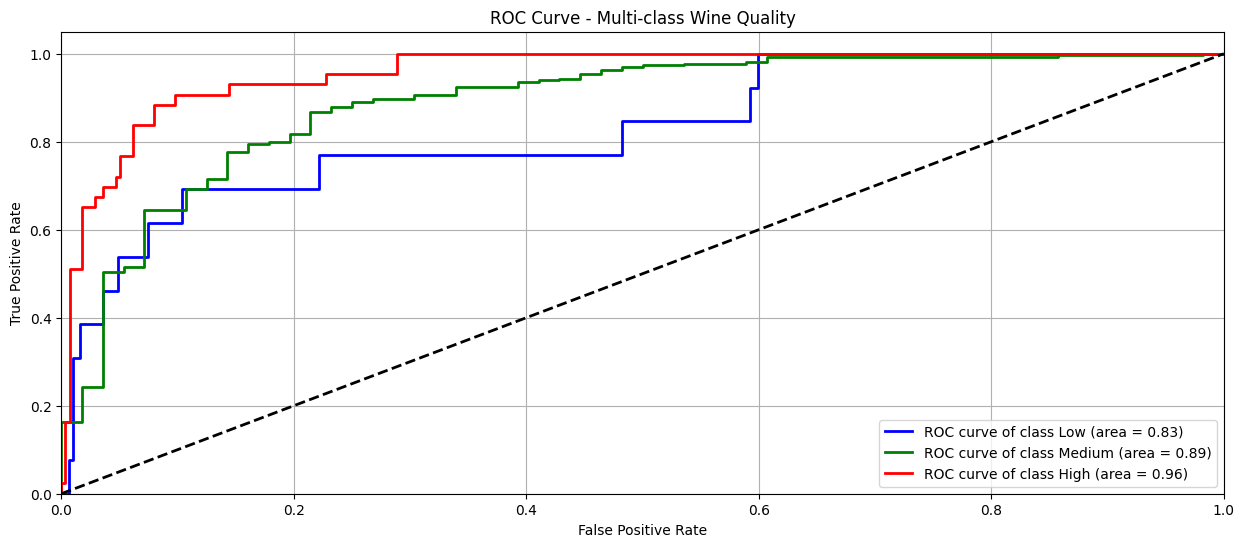

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

y_score = xgb_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15,6))
colors = ['blue', 'green', 'red']
class_names = ['Low', 'Medium', 'High']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Wine Quality')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [27]:
import pandas as pd


custom_data = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.70],
    'citric acid': [0.00],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11.0],
    'total sulfur dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4]
})
predicted_class = xgb_model.predict(custom_data)[0]
label_map = {0: "Low", 1: "Medium", 2: "High"}
predicted_label = label_map.get(predicted_class, "Unknown")
print("Predicted Quality:", predicted_label)


Predicted Quality: Medium


In [28]:
import pickle
f=open("xgb_model.pkl","wb")
pickle.dump(xgb_model,f)
f.close()